In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
v = [-0.03, 0.05] #v-, v+
L = 0.08
k = 0.05
alpha = 0.03
tau = 1000
T = 600
s2 = 1./tau
p = [0.94, 0.61]#p_c & p_ic
dt = 2
sigma = [1, -1]

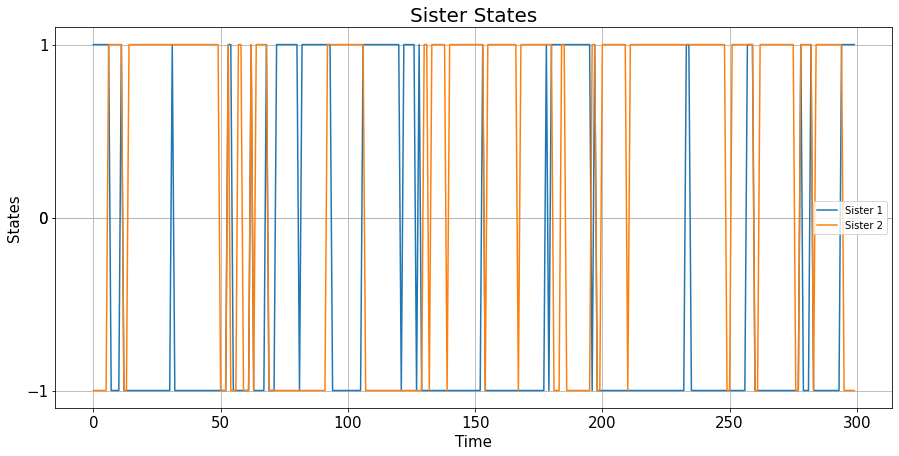

In [56]:
def a(X):
    """
    INPUT: 
        X : vector of sister positions
        
    OUTPUT:
        Y : spring + PEF component"""
    X1 = X[0]
    X2 = X[1]
    
    Y = np.zeros(2)
    Y[0] = -(k*(X1-X2-L*np.cos(0))) - (alpha*X1)
    Y[1] = -(k*(X2-X1+L*np.cos(0))) - (alpha*X2)
    
    return Y

def check_coherent(u):
    """
    INPUT:
        u : 1D vector of sister states
        
    OUTPUT:
        boolean to check if the sister states are coherent(opposite signs)"""
    if u == [1,-1] or u == [-1,1]:
        check = True
    else:
        check = False
    return check

def check_incoherent(u):
    """
    INPUT:
        u : 1D vector of sister states
        
    OUTPUT:
        boolean to check if the sister states are incoherent(same signs)"""
    if u == [1,1] or u == [-1,-1]:
        check = True
    else:
        check = False
    return check

def sister_states(p,T,dt):
    """
    INPUT:
        p : 1D vector of probabilities
        T : max time
        dt : time step
        
    OUTPUT:
        Y : 2D vector of the two sisters"""
    
    steps = np.arange(0,T,dt)
    Y = np.zeros((len(steps),2))
    Y[0] = sigma
    sign = -1
    
    
    for i in range(1,len(Y)):
        
        current_state = Y[i-1].tolist()
        sigma1 = current_state[0] #sister1
        sigma2 = current_state[1] #sister2
        
        #draw uniform random sample
        u = np.random.uniform(0,1,2)
        
        #check state
        if check_coherent(current_state):
            
            #compute new state using p_c
            if u[0] <= p[0] and u[1] <= p[0]: #remain coherent
                Y[i] = Y[i-1]
            elif u[0] <= p[0] and u[1] > p[0]: #sister 2 switches sign
                Y[i] = [sigma1, sigma2*sign]
            elif u[0] > p[0] and u[1] > p[0]: #both sisters switches sign
                Y[i] = [sigma1*sign, sigma2*sign]
            elif u[0] > p[0] and u[1] <= p[0]: #sister1 switches sign
                Y[i] = [sigma1*sign, sigma2]
        
        elif check_incoherent(current_state):
            
            #compute new state using p_ic
            if u[0] <= p[1] and u[1] <= p[1]: #remain coherent
                Y[i] = Y[i-1]
            elif u[0] <= p[1] and u[1] > p[1]: #sister 2 switches sign
                Y[i] = [sigma1, sigma2*sign]
            elif u[0] > p[1] and u[1] > p[1]: #both sisters switches sign
                Y[i] = [sigma1*sign, sigma2*sign]
            elif u[0] > p[1] and u[1] <= p[1]: #sister1 switches sign
                Y[i] = [sigma1*sign, sigma2]
    
    plt.figure(figsize=(15,7))
    plt.title('Sister States', fontsize=20)
    plt.xticks(fontsize=15);plt.yticks([-1,.0,0.0,1.0],fontsize=15)
    plt.xlabel('Time', fontsize=15);plt.ylabel('States',fontsize=15)
    plt.plot(Y[:,0],label='Sister 1')
    plt.plot(Y[:,1],label='Sister 2')
    plt.legend(fontsize=10)
    plt.grid('on')
    plt.savefig('./Plots/ss.png')
    plt.show()
    return Y

Y = sister_states(p,T,dt)

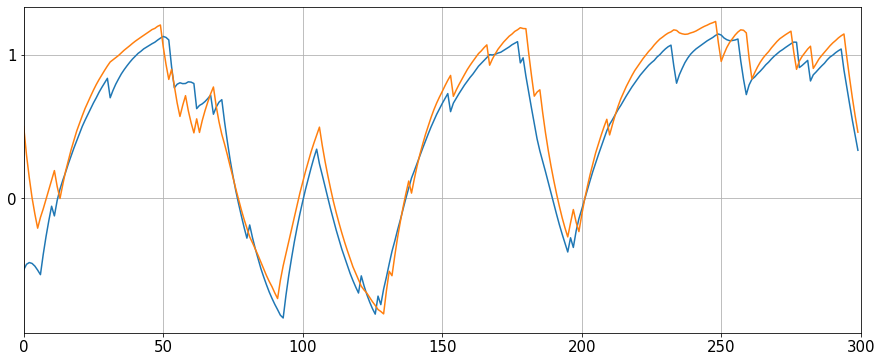

In [57]:
Z = np.zeros((len(Y),2))
Z[0] = [-0.5,0.5]

for i in range(1,len(Y)):
    
    X = a(Z[i-1])
    
    if Y[i,0] == -1 and Y[i,1] == 1:
        Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
        
    elif Y[i,0] == -1 and Y[i,1] == -1:
        Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt
    
    elif Y[i,0] == 1 and Y[i,1] == -1:
        Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt
    
    elif Y[i,0] == 1 and Y[i,1] == 1:
        Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
Z
plt.figure(figsize=(15,6))
plt.grid('on')
plt.xticks(fontsize='15');plt.yticks(fontsize='15',ticks=[-1.0,0.0,1.0])
plt.xlim(0,300)
plt.plot(Z[:,0])
plt.plot(Z[:,1])
plt.savefig('./Plots/new_oscillations.png')
plt.show()